# Fiting Vela Data with .dat

Federico García and Santiango Del Palacio with Luciano Combi.

Import libraries and plot options

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['legend.frameon'] = True

Load data in QDP format and re-center the date to the middle of the observation

In [39]:
data_A1=np.loadtxt('vela_A1.dat',skiprows=1)
data_A1=data_A1.transpose()
# We convert duration of observation to days
data_A1[1]=data_A1[1]/86400
# Now re-center the date to the middle
data_A1[0]=data_A1[0]+data_A1[1]/2.

#The same here
data_A2=np.loadtxt('vela_A2.dat',skiprows=1)
data_A2=data_A2.transpose()
data_A2[1]=data_A2[1]/86400
data_A2[0]=data_A2[0]+data_A2[1]/2


Plot the data. Units are microseconds from 89402 us and days with respect to MJD0

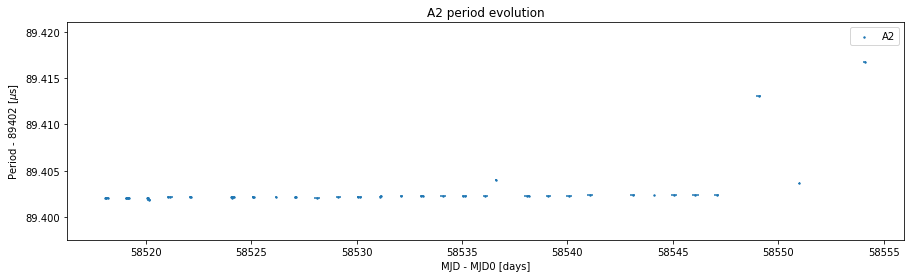

In [38]:
plt.scatter(data_A2[0],data_A2[2],alpha=1,s=2,label='A2')
plt.errorbar(data_A2[0],data_A2[2],xerr=data_A2[1],yerr=data_A2[3], linestyle="None")
plt.title('A2 period evolution')
plt.xlabel('MJD - MJD0 [days]')
plt.ylabel('Period - 89402 [$\mu$s]')
plt.legend()
plt.show()

Import fitting library and define linear and quadratic models

In [5]:
from scipy.optimize import curve_fit

def linr(t, p0, p1):
    return p0 + t * p1

def quad(t, p0, p1, p2):
    return p0 + p1 * t + p2 * t**2

Define plots of residuals in chi units

In [6]:
def plot_delchi(x,y,error_x,error_y,model,number_of_params,title):
    
    plt.plot(x, np.zeros(len(y)), 'r-')
    plt.scatter(x,(y-model)/error_y,alpha=0.3,s=1)
    plt.errorbar(x,(y-model)/error_y,xerr=error_x,yerr=error_y/error_y, linestyle="None")

    plt.title(title)
    plt.xlabel('MJD - MJD0')
    plt.ylabel('(period - model)/error')
    plt.show()
    
    
    print(title)
    print('chi = ',(np.sum(np.power((y-model)/error_y,2))))
    print('dof = ', len(y)-number_of_params)
    print('reduced chi = ',(np.sum(np.power((y-model)/error_y,2)))/(len(y)-number_of_params))
    
    return 0



Fit the data and print the results 

In [7]:
popt_A1_linr, pcov_A1_linr = curve_fit(linr, data_A1[0], data_A1[2], sigma=data_A1[3])
popt_A2_linr, pcov_A2_linr = curve_fit(linr, data_A2[0], data_A2[2], sigma=data_A2[3])
popt_A1_quad, pcov_A1_quad = curve_fit(quad, data_A1[0], data_A1[2], sigma=data_A1[3])
popt_A2_quad, pcov_A2_quad = curve_fit(quad, data_A2[0], data_A2[2], sigma=data_A2[3])

popt_A1_linr, popt_A2_linr, popt_A1_quad, popt_A2_quad 

(array([0.05331764, 0.0109565 ]),
 array([0.05600102, 0.01083117]),
 array([ 4.85236187e-02,  1.16052528e-02, -1.88630186e-05]),
 array([ 5.53793483e-02,  1.09167776e-02, -2.53484200e-06]))

*********************************************************


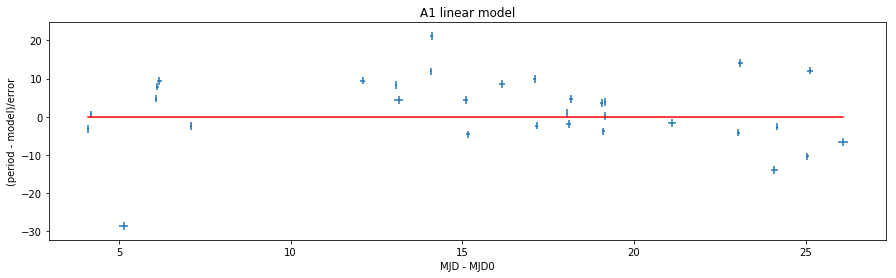

A1 linear model
chi =  2784.892034163781
dof =  30
reduced chi =  92.82973447212603
*********************************************************


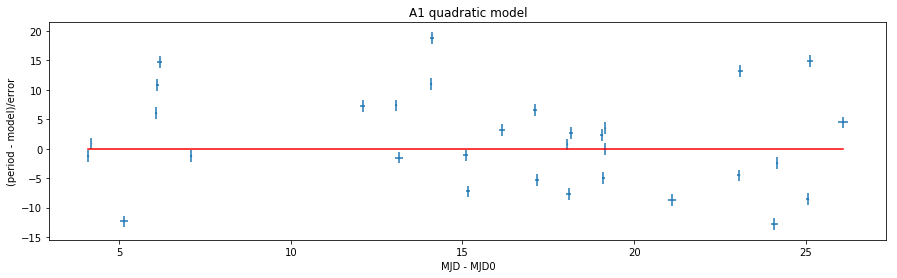

A1 quadratic model
chi =  2113.1358575006393
dof =  29
reduced chi =  72.8667537069186
*********************************************************


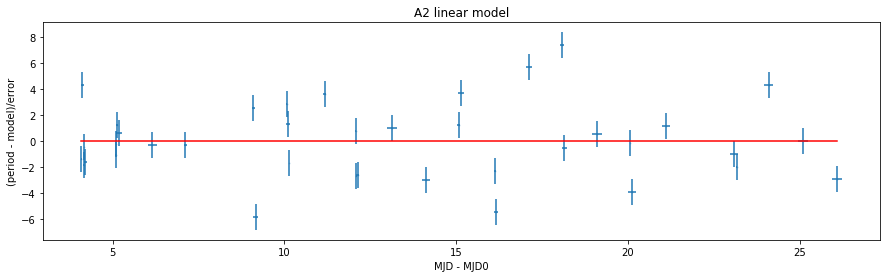

A2 linear model
chi =  306.7402502975767
dof =  36
reduced chi =  8.52056250826602
*********************************************************


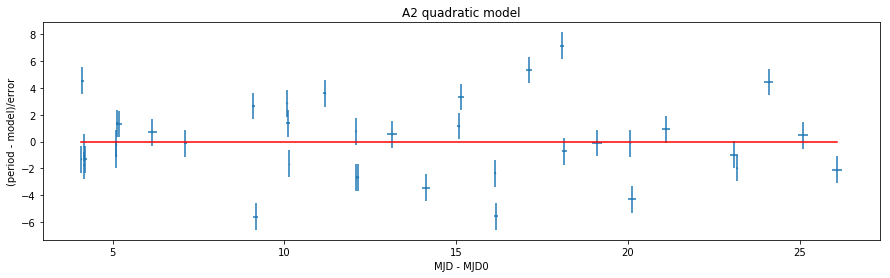

A2 quadratic model
chi =  302.6015862572249
dof =  35
reduced chi =  8.645759607349282
*********************************************************


In [8]:
print('*********************************************************')
plot_delchi(data_A1[0],data_A1[2],data_A1[1],data_A1[3],linr(data_A1[0], *popt_A1_linr),2,'A1 linear model')
print('*********************************************************')
plot_delchi(data_A1[0],data_A1[2],data_A1[1],data_A1[3],quad(data_A1[0], *popt_A1_quad),3,'A1 quadratic model')
print('*********************************************************')
plot_delchi(data_A2[0],data_A2[2],data_A2[1],data_A2[3],linr(data_A2[0], *popt_A2_linr),2,'A2 linear model')
print('*********************************************************')
plot_delchi(data_A2[0],data_A2[2],data_A2[1],data_A2[3],quad(data_A2[0], *popt_A2_quad),3,'A2 quadratic model')
print('*********************************************************')